In [1]:
import numpy as np

from pollen_manipulation.reachy_2.api import Reachy2ManipulationAPI

from pollen_vision.camera_wrappers.depthai import SDKWrapper
from pollen_vision.camera_wrappers.pollen_sdk_camera.pollen_sdk_camera_wrapper import PollenSDKCameraWrapper
from pollen_vision.camera_wrappers.depthai.utils import get_config_file_path
from pollen_vision.perception import Perception
from scipy.spatial.transform import Rotation

import FramesViewer.utils as fv_utils
from reachy2_sdk import ReachySDK

import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

#T_world_cam = fv_utils.make_pose([0.052644, 0.01, 0.034150], [0, 0, 0])
T_world_cam = fv_utils.make_pose([0.049597, 0.009989, 0.038089], [0, 0, 0])
T_world_cam[:3, :3] = np.array([[0, 0, 1], [-1, 0, 0], [0, -1, 0]])
T_world_cam = fv_utils.rotateInSelf(T_world_cam, [-48, 0, 0])

#T_world_cam = fv_utils.rotateInSelf(T_world_cam, [-48.0-90.0, 0, -90.0])

reachy = ReachySDK(host='localhost')
#cam = PollenSDKCameraWrapper(reachy)
cam = SDKWrapper(get_config_file_path("CONFIG_SR"), compute_depth=True)

K = cam.get_K()
print(K)

manipulation_api = Reachy2ManipulationAPI(reachy, T_world_cam, K)

perception = Perception(
    camera_wrapper=cam, T_world_cam=T_world_cam, freq=30.0
)
perception.start(visualize=False)

#perception.set_tracked_objects(['bottle'])
#perception.set_tracked_objects(['hammer'])
perception.set_tracked_objects(['mug','grey duct tape','scissors','pen','computer','metalic bolt with washer and nut', 'motor', 'pcb', 'small green printed circuit board with white connectors','small cylindrical metalic electric motor with wires'])

/home/steve/Project/Repo/Pollen/grasping/venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:334: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


[06/12/24 19:08:14] WARNING  Your inference package version 0.9.13 is out of date! Please upgrade to ]8;id=169237;file:///home/steve/Project/Repo/Pollen/grasping/venv/lib/python3.10/site-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=30671;file:///home/steve/Project/Repo/Pollen/grasping/venv/lib/python3.10/site-packages/inference/core/__init__.py#35\35]8;;\
                             version 0.12.0 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

[19443010B13E782700] [5.2] [1.467] [ColorCamera(1)] [warning] Unsupported resolution set for detected camera OV9782, needs 800_P or 720_P. Defaulting to 800_P
[19443010B13E782700] [5.2] [1.468] [ColorCamera(0)] [warning] Unsupported resolution set for detected camera OV9782, needs 800_P or 720_P. Defaulting to 800_P
[[     797.08           0      658.74]
 [          0      796.51      409.99]
 [          0           0           1]]
model func:  <module 'contact_graspnet_pytorch.contact_graspnet' from '/home/steve/Project/Repo/Pollen/grasping/contact_graspnet_pytorch/contact_graspnet_pytorch/contact_graspnet_pytorch/contact_graspnet.py'>
/home/steve/.cache/huggingface/hub/models--pollen-robotics--contact_graspnet/snapshots/16f1311d6380e2e6d4394d250897585fea0258a2/checkpoints/contact_graspnet/checkpoints/model.pt
=> Loading checkpoint from local file...
YOLO infer timing: 3.56500244140625
SAM infer timing: 0.3085205554962158
YOLO infer timing: 0.046159982681274414
SAM infer timing: 0.253

Cameras not initialized.


SAM infer timing: 0.24326562881469727
YOLO infer timing: 0.04067230224609375
SAM infer timing: 0.2660837173461914
YOLO infer timing: 0.04102373123168945
SAM infer timing: 0.2679116725921631
YOLO infer timing: 0.04092288017272949
SAM infer timing: 0.21098899841308594
YOLO infer timing: 0.03844928741455078
SAM infer timing: 0.25343966484069824
YOLO infer timing: 0.043501853942871094
SAM infer timing: 0.2477250099182129
YOLO infer timing: 0.04136180877685547
SAM infer timing: 0.2403264045715332
YOLO infer timing: 0.041927337646484375
SAM infer timing: 0.22107791900634766
YOLO infer timing: 0.041823387145996094
SAM infer timing: 0.26372408866882324
YOLO infer timing: 0.0412602424621582
SAM infer timing: 0.2621030807495117
YOLO infer timing: 0.0386652946472168
SAM infer timing: 0.2381737232208252
YOLO infer timing: 0.03931546211242676
SAM infer timing: 0.23757100105285645
YOLO infer timing: 0.03493642807006836
SAM infer timing: 0.22146081924438477
YOLO infer timing: 0.038225412368774414
SAM

In [2]:
reachy.connect()

Already connected to Reachy.


In [4]:
manipulation_api.turn_robot_on()

In [5]:
manipulation_api.goto_rest_position(left=True)

In [6]:
manipulation_api.goto_rest_position(left=False)

In [7]:
reachy.l_arm.gripper.open()
reachy.r_arm.gripper.open()


In [ ]:
reachy.l_arm.gripper.close()
reachy.r_arm.gripper.close()

In [ ]:
reachy.l_arm.inverse_kinematics(T_world_cam)

In [ ]:
#perception.set_tracked_objects(['apple'])
perception.tracked_objects=['grey duct tape','scissors','pen','computer','metalic bolt with washer and nut', 'motor', 'pcb', 'small green printed circuit board with white connectors','small cylindrical metalic electric motor with wires']

In [ ]:
print(perception.tracked_objects)
perception.last_predictions

In [8]:
import matplotlib.pyplot as plt
import cv2

In [9]:
image=perception.last_im
for i in perception.last_predictions:
    print(i)
    image = cv2.rectangle(image, (i['box']['xmin'],i['box']['ymin']), (i['box']['xmax'],i['box']['ymax']), (255,0,0), 3)
    image = cv2.putText(image, i['label'], (i['box']['xmin'],i['box']['ymin']-10), cv2.FONT_HERSHEY_SIMPLEX ,  1, (255,0.0), 2, cv2.LINE_AA) 
    image = cv2.putText(image, f"{i['score']:.2f}", (i['box']['xmin'],i['box']['ymax']+30), cv2.FONT_HERSHEY_SIMPLEX ,  1, (255,0.0), 2, cv2.LINE_AA) 


{'label': 'mug', 'score': 0.9413228631019592, 'box': {'xmin': 760, 'ymin': 414, 'xmax': 930, 'ymax': 638}}
{'label': 'pen', 'score': 0.8368217945098877, 'box': {'xmin': 472, 'ymin': 242, 'xmax': 522, 'ymax': 349}}
{'label': 'computer', 'score': 0.7264748215675354, 'box': {'xmin': 0, 'ymin': 2, 'xmax': 367, 'ymax': 369}}
{'label': 'mug', 'score': 0.5209009647369385, 'box': {'xmin': 510, 'ymin': 168, 'xmax': 636, 'ymax': 334}}
{'label': 'scissors', 'score': 0.17728683352470398, 'box': {'xmin': 673, 'ymin': 181, 'xmax': 811, 'ymax': 266}}
{'label': 'computer', 'score': 0.17402899265289307, 'box': {'xmin': 914, 'ymin': 0, 'xmax': 1279, 'ymax': 431}}
{'label': 'pen', 'score': 0.03542172536253929, 'box': {'xmin': 674, 'ymin': 182, 'xmax': 710, 'ymax': 239}}
{'label': 'computer', 'score': 0.03315114602446556, 'box': {'xmin': 299, 'ymin': 391, 'xmax': 429, 'ymax': 554}}
{'label': 'computer', 'score': 0.025611355900764465, 'box': {'xmin': 908, 'ymin': 0, 'xmax': 1280, 'ymax': 770}}
{'label': 'p

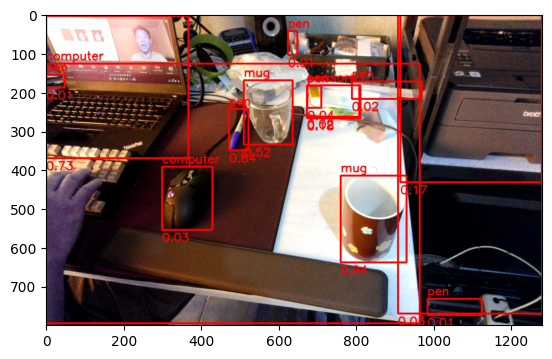

In [10]:
#cv2.imwrite('test_steve4.png',perception.last_im)
plt.imshow(image)
#plt.imshow(perception.last_depth*100)
plt.show()
#cv2.imshow('left',perception.last_im)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
np.count_nonzero(np.isnan(perception.last_depth))

In [ ]:
print(f"last pred: {perception.last_predictions}\n\n")
print(f"obj info: {perception.get_objects_infos(threshold=0.1)}")

In [ ]:
print(perception.get_objects_infos())
object_info = [info for info in perception.get_objects_infos() if info['name'] == 'apple']

if len(object_info) == 0:
    print('No apple found')

elif len(object_info) == 1:
    bottle_info = object_info[0]
    print('Found a apple')

else:
    print(f'Found {len(object_info)} apple')

In [10]:
from scipy.spatial.transform import Rotation as R

def compute_goal_diff(fk_matrix, goal_pose):
    return np.linalg.norm(fk_matrix - selected_array)

def compute_l2_distance(fk_matrix, goal_pose):
    return np.linalg.norm(fk_matrix[:-1, 3] - goal_pose[:-1, 3])


def produce_symetrical_poses(grasp_poses):
    symetrical_grasp_poses = []

    for grasp_pose in grasp_poses:
        symetrical_grasp_pose = np.eye(4)
        x, y, z = grasp_pose[:-1, 3]
        symetrical_grasp_pose[:-1, 3] = [x, -y, z]

        rotation_matrix = grasp_pose[:-1, :-1]
        roll, pitch, yaw = R.from_matrix(rotation_matrix).as_euler("xyz", degrees=True)
        symetrical_grasp_pose[:-1, :-1] = R.from_euler("xyz", [-roll, pitch, -yaw], degrees=True).as_matrix()
        symetrical_grasp_poses.append(symetrical_grasp_pose)

    return symetrical_grasp_poses

# Define the initial pose matrices for each arm used by goto_rest_position API method
right_start_pose = np.array([
    [0.0, 0.0, -1.0, 0.20],
    [0.0, 1.0, 0.0, -0.24],
    [1.0, 0.0, 0.0, -0.23],
    [0.0, 0.0, 0.0, 1.0],
])
left_start_pose = np.array([
    [0.0, 0.0, -1.0, 0.20],
    [0.0, 1.0, 0.0, 0.24],
    [1.0, 0.0, 0.0, -0.23],
    [0.0, 0.0, 0.0, 1.0],
])

In [11]:
def get_object(name,score=0.1):
    for o in perception.get_objects_infos(threshold=0.1):
        print(f"Object: {o['name']} score: {o['detection_score']}")
    #print(f'ALL OBJECTS: {perception.get_objects_infos()}')
    object_info = [info for info in perception.get_objects_infos(threshold=0.1) if info['name'] == name]
    print(f'OBJECT INFO: {object_info}')
    if len(object_info) == 0:
        print(f'No {name} found')
        return None, None, None, None
    elif len(object_info) == 1 and object_info[0]["detection_score"]>score:
        obj_info = object_info[0]
        print(f'Found a {name}')
        return obj_info["pose"], obj_info["rgb"], obj_info["mask"], obj_info["depth"]
    else:
        obj_info = object_info[0]
        print(f'Found {len(object_info)} {name}')
        return obj_info["pose"], obj_info["rgb"], obj_info["mask"], obj_info["depth"]
    

In [15]:
import time

#pose = bottle_info["pose"]
#rgb = bottle_info["rgb"]
#mask = bottle_info["mask"]
#depth = bottle_info["depth"]
#print(f"last pred: {perception.last_predictions}\n\n")
print(f"objs: {perception.get_objects_infos(threshold=0.1)}")
pose, rgb, mask, depth = get_object("mug", score=0.5)

left = True

if left:
    arm = manipulation_api.reachy.l_arm
    symetrical_arm = manipulation_api.reachy.r_arm
    start_pose = left_start_pose
    
else:
    arm = manipulation_api.reachy.r_arm
    symetrical_arm = manipulation_api.reachy.l_arm
    start_pose = right_start_pose

#raw_grasp_poses, raw_scores = manipulation_api.get_grasp_poses(rgb,depth,mask,left)
grasp_poses, _, raw_grasp_poses, raw_scores = manipulation_api.get_reachable_grasp_poses(rgb, depth, mask, left)
grasp_poses.insert(0, start_pose)

symetrical_grasp_poses = produce_symetrical_poses(grasp_poses)

print(len(grasp_poses))
for g in grasp_poses:
    #print(g)
    rot=g[:3,:3]
    r=Rotation.from_matrix(rot)
    print(f"mat: {g} \t rot: {r.as_euler('xyz',degrees=True)}")
    print("\n")
print("\n\n")
for g in raw_grasp_poses:
    rot=g[:3,:3]
    r=Rotation.from_matrix(rot)
    print(f"mat:\n{g} \t rot: {r.as_euler('xyz',degrees=True)}")
    print("\n")

objs: [{'name': 'mug', 'pose': array([[          1,           0,           0,     0.27793],
       [          0,           1,           0,   -0.078518],
       [          0,           0,           1,    -0.31717],
       [          0,           0,           0,           1]]), 'rgb': array([[[255, 244, 220],
        [255, 244, 220],
        [255, 246, 221],
        ...,
        [223, 185, 171],
        [216, 181, 150],
        [211, 176, 146]],

       [[255, 244, 220],
        [255, 244, 220],
        [255, 246, 221],
        ...,
        [223, 185, 171],
        [216, 181, 150],
        [211, 176, 146]],

       [[255, 241, 217],
        [255, 241, 217],
        [255, 242, 218],
        ...,
        [211, 172, 158],
        [214, 179, 148],
        [210, 175, 144]],

       ...,

       [[200, 150, 144],
        [200, 150, 144],
        [200, 150, 144],
        ...,
        [  0,  12,  35],
        [  0,  17,  31],
        [  0,  14,  29]],

       [[201, 135, 134],
        [201, 135,

ValueError: not enough values to unpack (expected 6, got 5)

In [13]:
#reachy.l_arm.inverse_kinematics?
#raw_grasp_poses
for p in raw_grasp_poses:
    try:
        reachy.l_arm.inverse_kinematics(p)
    except Exception as e:
        print(e)

NameError: name 'raw_grasp_poses' is not defined

In [ ]:
grasp_poses

In [ ]:
import FramesViewer.utils as fv_utils
print(start_pose)
test_pose = np.array([
    [1.0, 0.0, 0.0, 0.20],
    [0.0, 1.0, 0.0, 0.24],
    [0.0, 0.0, 1.0, -0.23],
    [0.0, 0.0, 0.0, 1.0],
])
#test_pose = np.array(
#[[    0.97108,     0.12796,     0.20156,     0.34125],
# [     0.2387,    -0.50425,   -0.82991,    0.032624],
# [ -0.0045594,     0.85403,    -0.52021,    -0.28659],
# [          0,           0,           0,           1]])
#test_pose=raw_grasp_poses[0]
print("\n")
#test_pose=fv_utils.rotateInSelf(test_pose, [0, -90, 0])
print(test_pose)
rot=test_pose[:3,:3]
r=Rotation.from_matrix(rot)
print(f"rot: {r.as_euler('xyz',degrees=True)}")

In [14]:
from scipy.spatial.transform import Rotation
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(grasp_poses) - 1,
    step=1,
    description='Tableau:',
    orientation='horizontal',
)

# Bouton pour exécuter l'action
button = widgets.Button(description="Send goal pose")

# Zone de sortie pour afficher les résultats
output = widgets.Output()

def on_slider_change(change):
    with output:
        clear_output()
        selected_index = change['new']
        selected_array = grasp_poses[selected_index]
        print(f"Tableau {selected_index + 1}:")
        print(selected_array)
        rot=selected_array[:3,:3]
        r=Rotation.from_matrix(rot)
        print(f"rot: {r.as_euler('xyz',degrees=True)}")
        goto_id = arm.goto_from_matrix(selected_array)

        if goto_id != -1:
            while not manipulation_api.reachy.is_move_finished(goto_id):
                time.sleep(0.1)

            time.sleep(1.0)

            joints_pos = arm.get_joints_positions()
            fk = arm.forward_kinematics()
        
            l2_dist = compute_l2_distance(fk, selected_array)
            print(f'l2 dist: {l2_dist}')

        #goto_id = symetrical_arm.goto_from_matrix(symetrical_grasp_poses[selected_index])
        #if goto_id != -1:
        #    while not manipulation_api.reachy.is_move_finished(goto_id):
        #        time.sleep(0.1)

        #    time.sleep(1.0)
                                                  
# Associer la fonction de changement de valeur au slider
slider.observe(on_slider_change, names='value')

# Afficher les widgets
display(slider, output)

NameError: name 'grasp_poses' is not defined

In [ ]:
manipulation_api.goto_rest_position(left=True)
manipulation_api.goto_rest_position(left=False)

In [ ]:
manipulation_api.reachy.set_pose('zero')